# Imports

In [1]:
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import h5py, os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from progressBar import ProgressBar

## Global Var Definitions

In [2]:
Mjj_selection = 1100.0
maxEvts = 1e7

# Function Definitions

In [3]:
def read_in_data( file_dir ):
    maxEvts = int(1e9)
    pb = ProgressBar(maxEvts)

    data = None
    labels = None
    flist = []
    for path, _, _ in os.walk( file_dir, followlinks=True ):
        print('reading ', path)
        flist += glob(path + '/' + '*result.h5')
    print('num files in dir:',len(flist))
    i_file = 0
    for i_file, fname in enumerate(flist):
        f = h5py.File(fname, 'r')
        #print(f.keys())
        aux_evts = np.array(f.get('results'))
        aux_evts = aux_evts[aux_evts[:,0] > Mjj_selection]
        if data is None:
            labels = list(f.get('labels'))
            print('Labels:')
            print(labels)
            pb.show(0)
            data = aux_evts
        else:
            data = np.append(data, aux_evts, axis=0)

        pb.show(data.shape[0])

        if data.shape[0] > maxEvts:
            break

    dt = [(str(s), '<f4') for s in labels ]
    data = np.array(list(zip(*data.T)), dtype=dt)

    N_evts = (i_file+1) * 10000 # ??? data_train.shape[0]#
    print('\nnum files read in dir ', file_dir, ': ', i_file+1)
    return [ data, labels, N_evts ] 

In [4]:
def plot_hist( data, xlabel, ylabel, title, plotname='', legend=[], ylogscale=True ):
    fig = plt.figure( )
    plot_hist_on_axis( plt.gca(), data, xlabel, ylabel, title, legend, ylogscale )
    if legend:
        plt.legend()
    plt.tight_layout()
    fig.savefig('fig/' + plotname + '_hist.png')
    plt.show()
    plt.close()


def plot_hist_on_axis( ax, data, xlabel, ylabel, title, legend=[], ylogscale=True ):
    bin_num = 70
    alpha = 0.4
    histtype = 'stepfilled'
    if ylogscale:
        ax.set_yscale('log', nonposy='clip')
    for i, dat in enumerate(data):
        if i > 0:
            histtype = 'step'
            alpha = 1.0
        ax.hist( dat, bins=bin_num, normed=True, alpha=alpha, histtype=histtype, label=legend[i] )
    ax.set_ylabel( ylabel )
    ax.set_xlabel( xlabel )
    ax.set_title( title, fontsize=10 )
    ax.tick_params(axis='both', which='minor', labelsize=8)
    #ax.set_ylim(bottom=1e-7)


In [5]:
def computeDiscriminatingVar_sum(l1, l2):
    out = (l1+l2)
    return out

def computeDiscriminatingVar_min(l1, l2):
    out = np.minimum(l1,l2)
    return out

In [6]:
def reject_outliers(loss, m = 5.):
    d = np.abs(loss - np.median(loss))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return loss[s<m]

# Data Samples

In [7]:
base_dir = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut'

sample_loc = {'qcdSigExt': base_dir + '/qcd_sqrtshatTeV_13TeV_PU40_EXT',  #_ALL # _ext + _ext2
              'GtoWW1': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_1.5TeV',
              'GtoWW2': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_2.5TeV',
              'GtoWW3': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_3.5TeV',
              'GtoWW4': base_dir + '/RSGraviton_WW_NARROW_13TeV_PU40_4.5TeV',
              'AtoHZ': base_dir + '/AtoHZ_to_ZZZ_13TeV_PU40',
              'GtoTTBroad': base_dir + '/RSGraviton_tt_BROAD_13TeV_PU40',
              'GtoTTNarr': base_dir + '/RSGraviton_tt_NARROW_13TeV_PU40'
             }

sample_label = {'qcdSigExt':r'QCD signal',
                'GtoWW1':r'$G(1.5 TeV)\to WW$',
                'GtoWW2':r'$G(2.5 TeV)\to WW$',
                'GtoWW3':r'$G(3.5 TeV)\to WW$',
                'GtoWW4':r'$G(4.5 TeV)\to WW$',
                'AtoHZ':r'$A \to HZ \to ZZZ$',
                'GtoTTBroad':r'$G \to TT broad$',
                'GtoTTNarr':r'$G \to TT narrow$'
               }

In [8]:
# read in data
data = {}
for n, file_dir in sample_loc.iteritems():
    print(n)
    sample, _, _ = read_in_data( file_dir )
    data[n] = sample # filter out outliers

qcdSigExt
('reading ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/qcd_sqrtshatTeV_13TeV_PU40_EXT')
('num files in dir:', 3903)
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[--------------------]  0% - ETA:129.1 h   ('\nnum files read in dir ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/qcd_sqrtshatTeV_13TeV_PU40_EXT', ': ', 3903)
GtoTTBroad
('reading ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/RSGraviton_tt_BROAD_13TeV_PU40')
('num files in dir:', 98)
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[--------------------]  0% - ETA: 18.8 h   ('\nnum files r

# Plot Losses

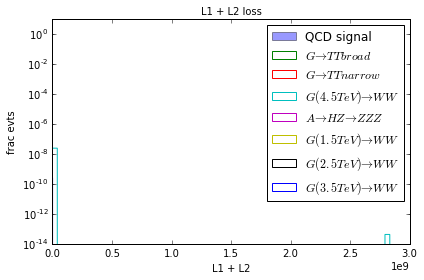

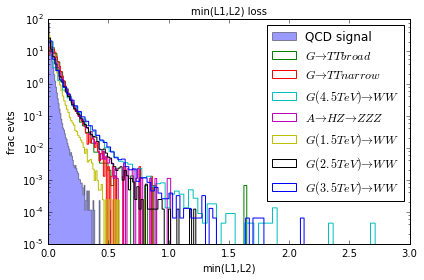

In [9]:
# plot L1 + L2 loss 1D distribution
losses = []
for n, label in sample_label.iteritems():
    x = data[n]
    y = computeDiscriminatingVar_sum(x['j1TotalLoss'],x['j2TotalLoss'])
    losses.append(y)
    
plot_hist( losses, 'L1 + L2', 'frac evts', 'L1 + L2 loss', 'sum_j1j2_reco_loss', list(sample_label.values()))

# plot min(L1,L2) loss 1D distribution
losses = []
for n, label in sample_label.iteritems():
    x = data[n]
    y = computeDiscriminatingVar_min(x['j1TotalLoss'],x['j2TotalLoss'])
    losses.append(y)
    
plot_hist( losses, 'min(L1,L2)', 'frac evts', 'min(L1,L2) loss', 'sum_j1j2_reco_loss', list(sample_label.values()))

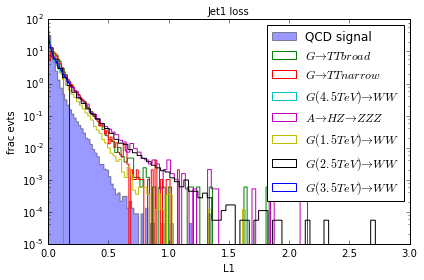

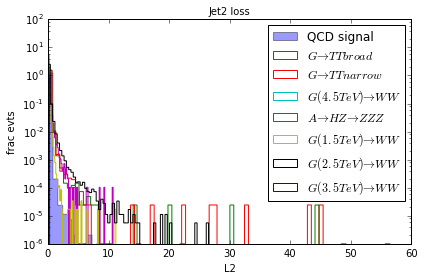

In [10]:
# plot L1 1D distribution
losses = []
for n, label in sample_label.iteritems():
    x = data[n]
    if n == 'GtoWW3' or n == 'GtoWW4':
        y = reject_outliers(x['j1TotalLoss'])
    else:
        y = x['j1TotalLoss']
    losses.append(y)
    
plot_hist( losses, 'L1', 'frac evts', 'Jet1 loss', 'l1_loss', list(sample_label.values()))

# plot min(L1,L2) loss 1D distribution
losses = []
for n, label in sample_label.iteritems():
    x = data[n]
    if n == 'GtoWW3' or n == 'GtoWW4':
        y = reject_outliers(x['j2TotalLoss'])
    else:
        y = x['j2TotalLoss']
    losses.append(y)
    
plot_hist( losses, 'L2', 'frac evts', 'Jet2 loss', 'l2_loss', list(sample_label.values()))